#Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import statsmodels.api as sm
%matplotlib inline

##Load transaction data in pandas dataframe

In [5]:
df = pd.read_json('./../ethereum_blockchain/data/transactions.json', lines=True)

In [6]:
df.head(5)

,_id,accountNonce,amount,blockHash,block_id,gasLimit,gasUsed,hash,isContractTx,newContract,parentHash,price,recipient,sender,time,txIndex,type
0,{u'$oid': u'59c2ce9a66a1615156cf51e7'},3324654,4.990932e+17,0xce9a4be92a53142c8e1962405342ded3472d5516bbc9...,4295887,50000,21000,0xfc505bf23efe13154192262c3f7b99e2517b133fe5f6...,NaN,0,0xfc505bf23efe13154192262c3f7b99e2517b133fe5f6...,2.100000e+10,0x656dd5d0020dc9047e7d9ec4eac344a7397200e8,0xea674fdde714fd979de3edf0f56aa9716b898ec8,2017-09-20T20:24:15.000Z,NaN,tx
1,{u'$oid': u'59c2ce9a66a1615156cf51e8'},3324658,1.492221e+17,0xce9a4be92a53142c8e1962405342ded3472d5516bbc9...,4295887,20967,9416,0xfa0124a64e4cedc7d75dff3ee0fca13d32b2a368e0cb...,NaN,0,0xad177c193597850a4c7c95cb990233a1190bd6118d33...,2.100000e+10,0x209c4784ab1e8183cf58ca33cb740efbf3fc18ef,0x0a8de3650a8f331e85673fe71677d53a749e6de7,2017-09-20T20:24:15.000Z,1.0,call
2,{u'$oid': u'59c2ce9a66a1615156cf51e9'},3324660,9.960846e+16,0xce9a4be92a53142c8e1962405342ded3472d5516bbc9...,4295887,50000,21000,0xe2a23b916903133728ab3dbfac55a56651508a971e89...,NaN,0,0xe2a23b916903133728ab3dbfac55a56651508a971e89...,2.100000e+10,0x951bec2b87e89a80ed785de7c9df1555cb8d4e05,0xea674fdde714fd979de3edf0f56aa9716b898ec8,2017-09-20T20:24:15.000Z,NaN,tx
3,{u'$oid': u'59c2ce9a66a1615156cf51ea'},3324657,1.990048e+17,0xce9a4be92a53142c8e1962405342ded3472d5516bbc9...,4295887,50000,21000,0xc431fcd82ad55dc1aee932fa9965b55f8515981147a0...,NaN,0,0xc431fcd82ad55dc1aee932fa9965b55f8515981147a0...,2.100000e+10,0xfd094f940ab0d01592c21afb20b500406ed509f6,0xea674fdde714fd979de3edf0f56aa9716b898ec8,2017-09-20T20:24:15.000Z,NaN,tx
4,{u'$oid': u'59c2ce9a66a1615156cf51eb'},3324662,1.000289e+18,0xce9a4be92a53142c8e1962405342ded3472d5516bbc9...,4295887,50000,21000,0xb759c34cb5b5af6f94f7002ef812b8482880d1f73d10...,NaN,0,0xb759c34cb5b5af6f94f7002ef812b8482880d1f73d10...,2.100000e+10,0x08dd9744e0dedef75f74357ca948485ea1d2d1f4,0xea674fdde714fd979de3edf0f56aa9716b898ec8,2017-09-20T20:24:15.000Z,NaN,tx


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000527 entries, 0 to 1000526
Data columns (total 17 columns):
_id             1000527 non-null object
accountNonce    1000527 non-null int64
amount          1000527 non-null float64
blockHash       1000527 non-null object
block_id        1000527 non-null int64
gasLimit        1000527 non-null int64
gasUsed         1000527 non-null int64
hash            1000527 non-null object
isContractTx    0 non-null float64
newContract     1000527 non-null int64
parentHash      1000527 non-null object
price           1000527 non-null float64
recipient       1000527 non-null object
sender          1000527 non-null object
time            1000527 non-null object
txIndex         340234 non-null float64
type            1000527 non-null object
dtypes: float64(4), int64(5), object(8)
memory usage: 137.4+ MB


In [8]:
df.shape

(1000527, 17)

##Count the number of unique block ids

In [9]:
np.unique(df['block_id'].values).shape

(9297,)

##Are the block ids contiguous?

In [10]:
blockids = np.sort(np.unique(df['block_id'].values))

In [11]:
blockids.shape

(9297,)

In [12]:
x = np.array([1,2,3,4,5,6,7,8,9,12])

In [13]:
for i in xrange(0, x.shape[0]-1):
    if (x[i+1] - x[i]) == 1:
        continue
    else:
        print(x[i+1], x[i], False)

(12, 9, False)


In [14]:
for i in xrange(0, blockids.shape[0]-1):
    if (blockids[i+1] - blockids[i]) == 1:
        continue
    else:
        print(blockids[i+1], blockids[i], (blockids[i+1] - blockids[i]), False)

(4286342, 4286340, 2, False)
(4286353, 4286351, 2, False)
(4286360, 4286358, 2, False)
(4286387, 4286385, 2, False)
(4286393, 4286391, 2, False)
(4286418, 4286416, 2, False)
(4286452, 4286450, 2, False)
(4286466, 4286464, 2, False)
(4286478, 4286476, 2, False)
(4286488, 4286486, 2, False)
(4286519, 4286517, 2, False)
(4286548, 4286546, 2, False)
(4286558, 4286556, 2, False)
(4286567, 4286565, 2, False)
(4286586, 4286584, 2, False)
(4286588, 4286586, 2, False)
(4286590, 4286588, 2, False)
(4286619, 4286617, 2, False)
(4286622, 4286620, 2, False)
(4286626, 4286624, 2, False)
(4286639, 4286637, 2, False)
(4286667, 4286665, 2, False)
(4286670, 4286668, 2, False)
(4286697, 4286695, 2, False)
(4286734, 4286732, 2, False)
(4286738, 4286736, 2, False)
(4286769, 4286767, 2, False)
(4286823, 4286821, 2, False)
(4286828, 4286826, 2, False)
(4286843, 4286841, 2, False)
(4286850, 4286848, 2, False)
(4286854, 4286852, 2, False)
(4286864, 4286862, 2, False)
(4286876, 4286874, 2, False)
(4286878, 4286

Need to retreive missing block ids so that we have continuous time
- check which ids are missing
- retrieve those ids from etherchain api 

In [15]:
blockids[0], blockids[9296]

(4286251, 4295887)

In [16]:
a = np.arange(4286251, 4295888, 1)

In [17]:
a.shape

(9637,)

In [18]:
np.array_equal(a, blockids)

False

In [19]:
missing = list(set(a) - set(blockids))

In [20]:
len(missing)

340

In [21]:
df = pd.DataFrame({'missing': missing})

In [22]:
df.to_csv('missing')

##Load block data into pandas dataframe

In [25]:
blocks = pd.read_json('./../ethereum_blockchain/data/blocks.json', lines=True)

In [26]:
more_blocks = pd.read_json('./../ethereum_blockchain/data/blocks_more.json', lines=True)

In [27]:
more_blocks['number'].head()

0    4287747.0
1    4292233.0
2    4293390.0
3    4295323.0
4    4293421.0
Name: number, dtype: float64

In [28]:
blocks.columns

Index([u'_id', u'blockTime', u'coinbase', u'difficulty', u'extra', u'gasLimit',
       u'gasUsed', u'hash', u'mixDigest', u'nonce', u'number', u'parentHash',
       u'reward', u'root', u'size', u'time', u'totalFee', u'txHash',
       u'tx_count', u'uncleHash', u'uncle_count'],
      dtype='object')

In [29]:
blocks['number'].values.shape

(9623,)

In [30]:
np.unique(blocks['number'].values).shape

(9623,)

In [31]:
more_blocks['number'].values.shape

(26,)

In [32]:
block_ids = blocks['number'].values

In [33]:
block_ids = block_ids.astype(int)

In [34]:
block_ids.dtype

dtype('int64')

In [35]:
#round floats to nearest integer
mb = np.rint(more_blocks['number'].values)

In [36]:
#Convert floats to int
mb = mb.astype(int)

In [37]:
all_block_ids = np.concatenate([block_ids, mb])

In [38]:
all_block_ids[-1]

4293426

In [39]:
a.shape

(9637,)

In [40]:
remaining = list(set(a) - set(all_block_ids))

In [41]:
len(remaining)

0

In [42]:
remaining

[]

In [43]:
val = 4291426
if val in mb:
    print(val, True)
else:
    print(val, False)

(4291426, True)


In [44]:
for val in mb:
    if val in all_block_ids:
        print(val, True)
    else:
        print(val, False)

(4287747, True)
(4292233, True)
(4293390, True)
(4295323, True)
(4293421, True)
(4293422, True)
(4293424, True)
(4293425, True)
(4290994, True)
(4293427, True)
(4293428, True)
(4293430, True)
(4293432, True)
(4293434, True)
(4292411, True)
(4293437, True)
(4293186, True)
(4295493, True)
(4292170, True)
(4291407, True)
(4287569, True)
(4288986, True)
(4291426, True)
(4289774, True)
(4292214, True)
(4293426, True)


In [45]:
remain_to_calc = pd.DataFrame({"block_id": remaining})

In [46]:
remain_to_calc.to_csv("./tocalc.csv")

In [47]:
blocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9623 entries, 0 to 9622
Data columns (total 21 columns):
_id            9623 non-null object
blockTime      9623 non-null int64
coinbase       9623 non-null object
difficulty     9623 non-null object
extra          9623 non-null object
gasLimit       9623 non-null float64
gasUsed        9623 non-null float64
hash           9623 non-null object
mixDigest      0 non-null float64
nonce          9623 non-null object
number         9623 non-null float64
parentHash     9623 non-null object
reward         9623 non-null object
root           9623 non-null object
size           9623 non-null int64
time           9623 non-null object
totalFee       9623 non-null object
txHash         9623 non-null object
tx_count       9623 non-null int64
uncleHash      9623 non-null object
uncle_count    9623 non-null int64
dtypes: float64(4), int64(4), object(13)
memory usage: 1.6+ MB


##Convert dtypes 
- Treat long integer types

In [71]:
ints = []
for row in blocks.totalFee.values:
    for k,v in row.iteritems():
        ints.append(v)

AttributeError: 'int' object has no attribute 'iteritems'

In [72]:
blocks.head()

,_id,blockTime,coinbase,difficulty,extra,gasLimit,gasUsed,hash,mixDigest,nonce,...,parentHash,reward,root,size,time,totalFee,txHash,tx_count,uncleHash,uncle_count
0,{u'$oid': u'59c5ce4166a161b6940c900f'},22,0x829bd824b016326a401d083b33d092293333a830,{u'$numberLong': u'2415063514546603'},0xe4b883e5bda9e7a59ee4bb99e9b1bc,6722221.0,1638699.0,0xed5a6d0ab1d8ebece462c60c5764013f8649fd2e340d...,NaN,0x88c3313c5808ea0b55,...,0x03ca1d1d9bc8976c871fe255ff8855b11408900c578b...,{u'$numberLong': u'5048829031919903000'},0x11466e02b478876a595f6032b3e434c80e3cf89dcae9...,6331,2017-09-19T22:30:42.000Z,{u'$numberLong': u'48829031919903220'},0x1a2f7f901498f820edd20d27a34ae46b4b766ff66ab1...,43,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0
1,{u'$oid': u'59c5ce4666a161b6940c9010'},13,0xea674fdde714fd979de3edf0f56aa9716b898ec8,{u'$numberLong': u'2416163026174379'},0x65746865726d696e652d657535,6715685.0,147000.0,0xe28f0bdb771db682f50eb672f6250427358a551aff35...,NaN,0x8844b0481556efb1ba,...,0xed5a6d0ab1d8ebece462c60c5764013f8649fd2e340d...,{u'$numberLong': u'5003150000000000000'},0x3d612737f50e54b4f81d0bf0df3ddc6c921590c83ef7...,1306,2017-09-19T22:30:55.000Z,{u'$numberLong': u'3150000000000000'},0x45fa09c65004ef8381993a3b9aa2fd4c9b69c55cc0e9...,7,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0
2,{u'$oid': u'59c5ce4c66a161b6940c9011'},2,0xea674fdde714fd979de3edf0f56aa9716b898ec8,{u'$numberLong': u'2418442304904779'},0x65746865726d696e652d6173696137,6709136.0,6467763.0,0x3677a004073c59fd13342b10ee9e4f78838e116d6b8e...,NaN,0x882bda7cc01380352b,...,0xe28f0bdb771db682f50eb672f6250427358a551aff35...,{u'$numberLong': u'5067934995026004000'},0x3491fdd5fb13ff6445b4919dd771354a6e6b4b97cb2c...,21486,2017-09-19T22:30:57.000Z,{u'$numberLong': u'67934995026003860'},0x33cf3315cf8d7fdfffaf8749b8f4365ab1d30f586901...,47,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0
3,{u'$oid': u'59c5ce5166a161b6940c9012'},24,0xb2930b35844a230f00e51431acae96fe543a0347,{u'$numberLong': u'2418360936500864'},0x7439,6702587.0,6643541.0,0xaf013391d383533db3fd2ff9bfa58f17db9d64c1ff6f...,NaN,0x884334f56011dd99ff,...,0x3677a004073c59fd13342b10ee9e4f78838e116d6b8e...,{u'$numberLong': u'5062887994431406000'},0xc4c2bd2ea2e93af93fe168cf1fa30e59f1c5394c39e3...,15432,2017-09-19T22:31:21.000Z,{u'$numberLong': u'62887994431406510'},0xbc846d47e24ec42f482644489c90c4b516d626896dac...,86,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0
4,{u'$oid': u'59c5ce5766a161b6940c9013'},27,0xea674fdde714fd979de3edf0f56aa9716b898ec8,{u'$numberLong': u'2418279607827615'},0x65746865726d696e652d657532,6709099.0,229962.0,0x7fd784d3a2ec316efa7e1dde6d53c5b4572fdeddbc83...,NaN,0x88a7da800018156043,...,0xaf013391d383533db3fd2ff9bfa58f17db9d64c1ff6f...,{u'$numberLong': u'5004893252000000000'},0x4784e3313ad18136db83ef9f715858022c6e13ecbbed...,1649,2017-09-19T22:31:48.000Z,{u'$numberLong': u'4893252000000000'},0xeda7239a129ba5ae52688bd7cbee9089b84d45fff09e...,10,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0


In [50]:
blocks['number'].values.dtype

dtype('float64')

In [51]:
for col in blocks.columns:
    print(col, blocks[col].values.dtype)
    if blocks[col].values.dtype == 'float64'

(u'_id', dtype('O'))
(u'blockTime', dtype('int64'))
(u'coinbase', dtype('O'))
(u'difficulty', dtype('O'))
(u'extra', dtype('O'))
(u'gasLimit', dtype('float64'))
(u'gasUsed', dtype('float64'))
(u'hash', dtype('O'))
(u'mixDigest', dtype('float64'))
(u'nonce', dtype('O'))
(u'number', dtype('float64'))
(u'parentHash', dtype('O'))
(u'reward', dtype('O'))
(u'root', dtype('O'))
(u'size', dtype('int64'))
(u'time', dtype('O'))
(u'totalFee', dtype('O'))
(u'txHash', dtype('O'))
(u'tx_count', dtype('int64'))
(u'uncleHash', dtype('O'))
(u'uncle_count', dtype('int64'))


##Check NaN values

In [108]:
for col in df.columns:
    print(col, df[col].isnull().sum())

(u'_id', 0)
(u'accountNonce', 0)
(u'amount', 0)
(u'blockHash', 0)
(u'block_id', 0)
(u'gasLimit', 0)
(u'gasUsed', 0)
(u'hash', 0)
(u'isContractTx', 1000527)
(u'newContract', 0)
(u'parentHash', 0)
(u'price', 0)
(u'recipient', 0)
(u'sender', 0)
(u'time', 0)
(u'txIndex', 660293)
(u'type', 0)


In [109]:
df['newContract'].value_counts()

0    997356
1      3171
Name: newContract, dtype: int64

In [110]:
df['type'].value_counts()

tx         657122
call       325682
create      17479
suicide       244
Name: type, dtype: int64

In [9]:
df['txIndex'].value_counts()

1.0     79194
2.0     39201
3.0     21742
4.0     17740
5.0     16379
6.0     14164
7.0     12921
8.0      5075
9.0      2288
11.0     1951
10.0     1950
12.0     1942
13.0     1672
14.0     1121
15.0      613
16.0      566
17.0       98
18.0       41
19.0        6
20.0        4
Name: txIndex, dtype: int64

In [111]:
df[df['amount'] == 0].shape

(490581, 17)

In [112]:
df[df['amount'] != 0].shape

(509946, 17)

In [113]:
# average gas price
np.mean(df['price'].values)

30716005102.199036

##Binarize the amount column

In [13]:
df['amount_binary'] = df['amount'].map(lambda x: 0 if x == 0 else 1)

In [14]:
df.head()

,_id,accountNonce,amount,blockHash,block_id,gasLimit,gasUsed,hash,isContractTx,newContract,parentHash,price,recipient,sender,time,txIndex,type,amount_binary
0,{u'$oid': u'59c2ce9a66a1615156cf51e7'},3324654,4.990932e+17,0xce9a4be92a53142c8e1962405342ded3472d5516bbc9...,4295887,50000,21000,0xfc505bf23efe13154192262c3f7b99e2517b133fe5f6...,NaN,0,0xfc505bf23efe13154192262c3f7b99e2517b133fe5f6...,2.100000e+10,0x656dd5d0020dc9047e7d9ec4eac344a7397200e8,0xea674fdde714fd979de3edf0f56aa9716b898ec8,2017-09-20T20:24:15.000Z,NaN,tx,1
1,{u'$oid': u'59c2ce9a66a1615156cf51e8'},3324658,1.492221e+17,0xce9a4be92a53142c8e1962405342ded3472d5516bbc9...,4295887,20967,9416,0xfa0124a64e4cedc7d75dff3ee0fca13d32b2a368e0cb...,NaN,0,0xad177c193597850a4c7c95cb990233a1190bd6118d33...,2.100000e+10,0x209c4784ab1e8183cf58ca33cb740efbf3fc18ef,0x0a8de3650a8f331e85673fe71677d53a749e6de7,2017-09-20T20:24:15.000Z,1.0,call,1
2,{u'$oid': u'59c2ce9a66a1615156cf51e9'},3324660,9.960846e+16,0xce9a4be92a53142c8e1962405342ded3472d5516bbc9...,4295887,50000,21000,0xe2a23b916903133728ab3dbfac55a56651508a971e89...,NaN,0,0xe2a23b916903133728ab3dbfac55a56651508a971e89...,2.100000e+10,0x951bec2b87e89a80ed785de7c9df1555cb8d4e05,0xea674fdde714fd979de3edf0f56aa9716b898ec8,2017-09-20T20:24:15.000Z,NaN,tx,1
3,{u'$oid': u'59c2ce9a66a1615156cf51ea'},3324657,1.990048e+17,0xce9a4be92a53142c8e1962405342ded3472d5516bbc9...,4295887,50000,21000,0xc431fcd82ad55dc1aee932fa9965b55f8515981147a0...,NaN,0,0xc431fcd82ad55dc1aee932fa9965b55f8515981147a0...,2.100000e+10,0xfd094f940ab0d01592c21afb20b500406ed509f6,0xea674fdde714fd979de3edf0f56aa9716b898ec8,2017-09-20T20:24:15.000Z,NaN,tx,1
4,{u'$oid': u'59c2ce9a66a1615156cf51eb'},3324662,1.000289e+18,0xce9a4be92a53142c8e1962405342ded3472d5516bbc9...,4295887,50000,21000,0xb759c34cb5b5af6f94f7002ef812b8482880d1f73d10...,NaN,0,0xb759c34cb5b5af6f94f7002ef812b8482880d1f73d10...,2.100000e+10,0x08dd9744e0dedef75f74357ca948485ea1d2d1f4,0xea674fdde714fd979de3edf0f56aa9716b898ec8,2017-09-20T20:24:15.000Z,NaN,tx,1


##Convert time to date time object

In [129]:
date['time'] = pd.to_datetime(df.time, yearfirst=True)

In [135]:
dates = date['time'].values.astype('datetime64[D]')

In [137]:
np.unique(dates)

array(['2017-09-18', '2017-09-19', '2017-09-20'], dtype='datetime64[D]')

The data spans over 3 days: 2017-09-18 –> 2017-09-20

##Create some plots

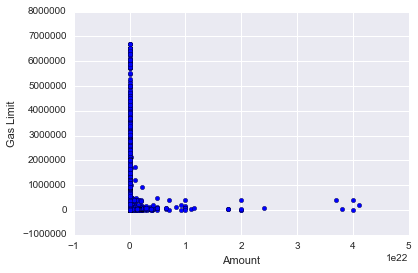

In [17]:
plt.scatter(df['amount'], df['gasLimit'])
plt.xlabel('Amount')
plt.ylabel('Gas Limit')

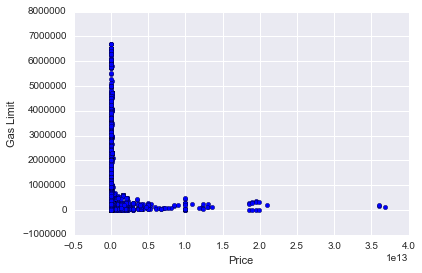

In [18]:
plt.scatter(df['price'], df['gasLimit'])
plt.xlabel('Price')
plt.ylabel('Gas Limit')

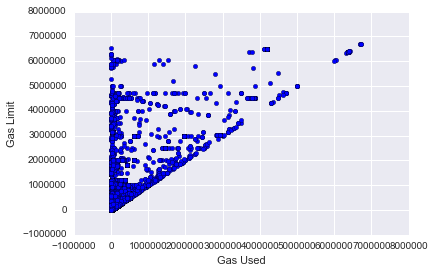

In [19]:
plt.scatter(df['gasUsed'], df['gasLimit'])
plt.xlabel('Gas Used')
plt.ylabel('Gas Limit')

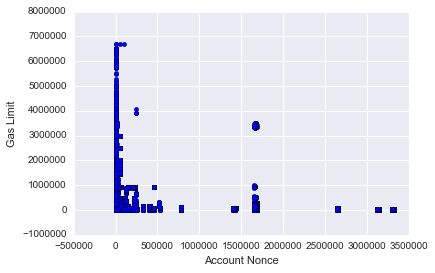

In [20]:
plt.scatter(df['accountNonce'], df['gasLimit'])
plt.xlabel('Account Nonce')
plt.ylabel('Gas Limit')

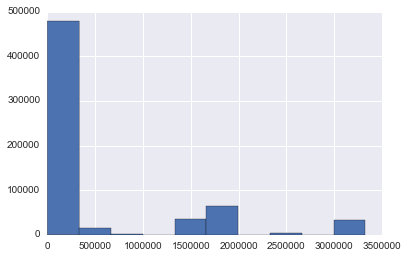

In [21]:
df['accountNonce'].hist()

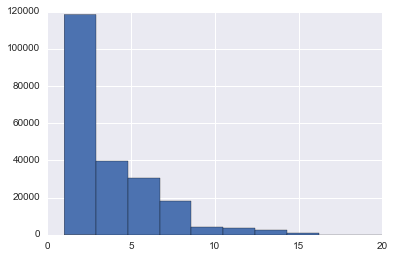

In [22]:
df['txIndex'].hist()

(0, 2500000)

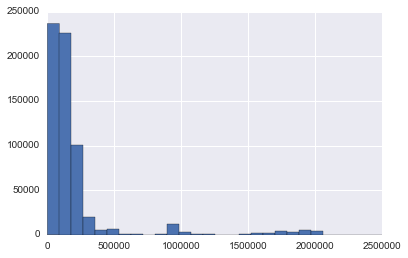

In [23]:
df['gasLimit'].hist(bins=75)
plt.xlim(0, 2500000)

(0, 400000)

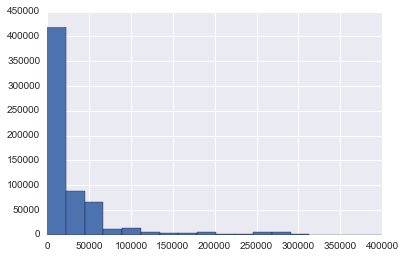

In [24]:
df['gasUsed'].hist(bins=300)
plt.xlim(0, 400000)

##Candidate features to predict gasLimit

- gasUsed
- accountNonce
- newContract
- type
- price
- amount
- binary amount

##Questions: 
- which of these can actually be employed as a predictor variable? 
- which variables do we know a priori such that we can factor them into our model

In [25]:
feature_df = df[['gasUsed', 
           'accountNonce', 
           'newContract', 
           'type', 
           'price', 
           'amount', 
           'amount_binary']]

In [26]:
feature_df.head()

,gasUsed,accountNonce,newContract,type,price,amount,amount_binary
0,21000,3324654,0,tx,2.100000e+10,4.990932e+17,1
1,9416,3324658,0,call,2.100000e+10,1.492221e+17,1
2,21000,3324660,0,tx,2.100000e+10,9.960846e+16,1
3,21000,3324657,0,tx,2.100000e+10,1.990048e+17,1
4,21000,3324662,0,tx,2.100000e+10,1.000289e+18,1


##One-hot encode the type column

In [27]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
feature_df['type_encoded'] = le.fit_transform(feature_df['type'])
feature_df.drop('type', axis=1, inplace=True)

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [28]:
X = feature_df.values

In [29]:
X.shape

(636595, 7)

In [30]:
y = df['gasLimit'].values

In [31]:
y.shape

(636595,)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

##Linear regression

In [33]:
def linear_regression(X_train, X_test, y_train, y_test):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    scores = cross_val_score(lr, X_train, y_train, scoring='r2', cv=5)
    print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
    print('R2_score: {}'.format(r2_score(y_test, y_pred)))
    print('avg_CV_score: {}'.format(np.mean(scores)))
    return lr

In [34]:
linear_regression(X_train, X_test, y_train, y_test)

MSE: 1.38869319463e+11
R2_score: 0.193471429489
avg_CV_score: 0.191722867738


//anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
# get summary statistics from statsmodels
model = sm.OLS(y_train, X_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                      -0.236
Model:                            OLS   Adj. R-squared:                 -0.236
Method:                 Least Squares   F-statistic:                -4.561e+04
Date:                Fri, 22 Sep 2017   Prob (F-statistic):               1.00
Time:                        11:07:02   Log-Likelihood:            -6.8987e+06
No. Observations:              477446   AIC:                         1.380e+07
Df Residuals:                  477443   BIC:                         1.380e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0004    5.2e-06     75.515      0.000       0.000       0.000
x2             0.0491      0.001     75.515      0.000       0.048       0.050
x3          7.799e-12   1.03e-13     75.515      0.000     7.6e-12       8e-12
x4          1.819e-07   4.19e-09     43.361      0.000    1.74e-07     1.9e-07
x5          1.618e-17   3.07e-18      5.264      0.000    1.02e-17    2.22e-17
x6          1.287e-08    1.7e-10     75.515      0.000    1.25e-08    1.32e-08
x7          3.904e-08   5.17e-10     75.515      0.000     3.8e-08    4.01e-08
==============================================================================
Omnibus:                   472730.697   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         27926324.007
Skew:                           4.898   Prob(JB):                         0.00
Kurtosis:                      39.164   Cond. No.                     3.92e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.92e+21. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##Random forest regressor

In [36]:
def rf_regressor(X_train, X_test, y_train, y_test):
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    scores = cross_val_score(rf, X_train, y_train, scoring='r2', cv=5)
    print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
    print('R2_score: {}'.format(r2_score(y_test, y_pred)))
    print('avg_CV_score: {}'.format(np.mean(scores)))
    return rf

In [37]:
model = rf_regressor(X_train, X_test, y_train, y_test)

MSE: 17290779718.0
R2_score: 0.899578194068
avg_CV_score: 0.899075813416


The average gas price is: 30575988051.298569

In [38]:
30575988051.298569 - 16249233479.3

14326754571.99857

In [39]:
def plot_feature_importance(rf, feature_df):
    cols = []
    for col in feature_df.columns:
        cols.append(col)

    feat_scores = pd.DataFrame({'Fraction of Samples Affected' : rf.feature_importances_},
                           index=cols)
    feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
    feat_scores.plot(kind='barh', color='r', figsize=(6,6))
    plt.xlabel('Importance', fontsize=18)
    plt.title('Feature Importance', fontsize=18)

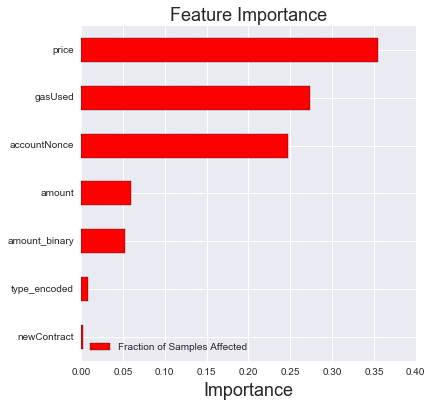

In [40]:
plot_feature_importance(model, feature_df)

##AdaBoost

In [41]:
ada = AdaBoostRegressor()

In [42]:
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

In [43]:
y_pred_ada = ada.predict(X_test)

In [44]:
r2_score(y_test, y_pred_ada)

-0.28443743142110289

##Separate based on amount
- amounts with a zero value have input data
- non-zero amounts do not have input data
- input data seems to be reflected in the gas used

##Amount is zero

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


MSE: 24050968423.4
R2_score: 0.913175799911
avg_CV_score: 0.904780792978


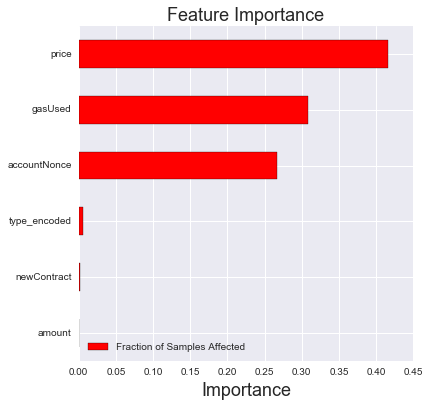

In [45]:
amt_zero = df[(df['amount'] == 0)]
le = preprocessing.LabelEncoder()
amt_zero['type_encoded'] = le.fit_transform(amt_zero['type'])
amt_zero.drop('type', axis=1, inplace=True)
#plt.scatter(amt_zero['amount'], amt_zero['gasLimit'])
#plt.ylabel('Gas Limit')
#plt.xlabel('Amount')
feat_zero = amt_zero[['gasUsed', 
                      'accountNonce', 
                      'newContract', 
                      'type_encoded', 
                      'price', 
                      'amount']]
X0 = feat_zero.values
y0 = amt_zero['gasLimit'].values
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0)
##Random forest regressor for zero amounts
rf0 = rf_regressor(X0_train, X0_test, y0_train, y0_test)
plot_feature_importance(rf0, feat_zero)

##Amount greater than zero

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


MSE: 7267040098.89
R2_score: 0.734986701413
avg_CV_score: 0.689898330232


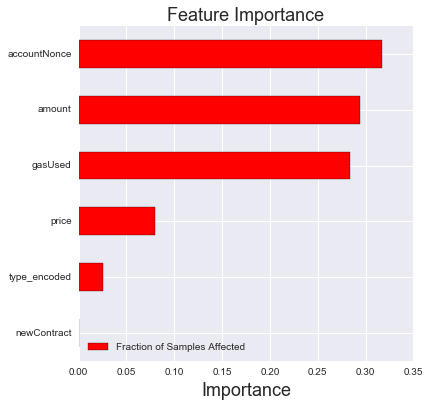

In [46]:
amt_zero = df[(df['amount'] > 0)]
le = preprocessing.LabelEncoder()
amt_zero['type_encoded'] = le.fit_transform(amt_zero['type'])
amt_zero.drop('type', axis=1, inplace=True)
#plt.scatter(amt_zero['amount'], amt_zero['gasLimit'])
#plt.ylabel('Gas Limit')
#plt.xlabel('Amount')
feat_zero = amt_zero[['gasUsed', 
                      'accountNonce', 
                      'newContract', 
                      'type_encoded', 
                      'price', 
                      'amount']]
X0 = feat_zero.values
y0 = amt_zero['gasLimit'].values
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0)
##Random forest regressor for zero amounts
rf0 = rf_regressor(X0_train, X0_test, y0_train, y0_test)
plot_feature_importance(rf0, feat_zero)

#Clustering

In [68]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [48]:
sel_cols = ['block_id', 'price', 'amount']

In [49]:
df[sel_cols].head()

,block_id,price,amount
0,4295887,2.100000e+10,4.990932e+17
1,4295887,2.100000e+10,1.492221e+17
2,4295887,2.100000e+10,9.960846e+16
3,4295887,2.100000e+10,1.990048e+17
4,4295887,2.100000e+10,1.000289e+18


In [50]:
X_km = df[sel_cols].values

In [51]:
y_km = df['gasLimit'].values

In [52]:
X_train_km, X_test_km, y_train_km, y_test_km = train_test_split(X_km, y_km)

In [72]:
km = KMeans(n_clusters=4)

In [73]:
km.fit(X_train_km)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [74]:
labels = km.labels_
centroids = km.cluster_centers_

In [75]:
centroids[:,1]

array([  3.08470593e+10,   2.17342849e+10,   3.61161988e+10,
         2.32890338e+10])

##Elbow method to determine n_clusters

In [61]:
Nc = range(1, 20)

In [62]:
km = [KMeans(n_clusters=i) for i in Nc]

In [66]:
score = [km[i].fit(X_train_km).score(X_train_km) for i in range(len(km))]

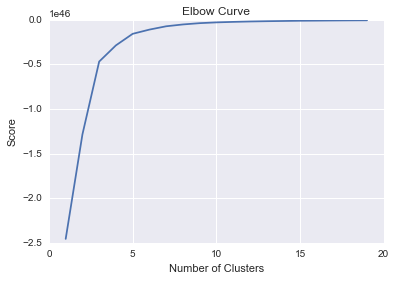

In [67]:
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')

4 clusters seems appropriate

In [76]:
def ClusterIndicesNumpy(clustNum, labels_array): 
    return np.where(labels_array == clustNum)[0]

In [85]:
ClusterIndicesNumpy(3, labels)

array([    14,    296,    333, ..., 477276, 477325, 477345])

In [86]:
X_train_km[ClusterIndicesNumpy(3, labels)]

array([[  4.29308700e+06,   2.10000000e+10,   8.31789876e+20],
       [  4.29577100e+06,   2.10000000e+10,   5.78139765e+20],
       [  4.29573100e+06,   2.10000000e+10,   5.64574708e+20],
       ..., 
       [  4.29484700e+06,   4.95000000e+10,   3.89557356e+20],
       [  4.29550800e+06,   2.20000000e+10,   8.38019938e+20],
       [  4.29512800e+06,   2.20000013e+10,   7.94500812e+20]])

In [84]:
{i: X_train_km[np.where(km.labels_ == i)] for i in range(km.n_clusters)}

{0: array([[  4.29210500e+06,   5.10000000e+10,   0.00000000e+00],
        [  4.29043800e+06,   5.10000000e+10,   0.00000000e+00],
        [  4.28850600e+06,   4.00000000e+09,   7.00000000e+18],
        ..., 
        [  4.28928100e+06,   4.00000000e+09,   2.00051395e+17],
        [  4.29379300e+06,   1.00000000e+10,   3.69768000e+15],
        [  4.29576200e+06,   5.01400000e+09,   0.00000000e+00]]),
 1: array([[  4.29055100e+06,   2.17593955e+10,   1.96989685e+21],
        [  4.29180600e+06,   2.25596963e+10,   1.98991306e+21],
        [  4.29069000e+06,   2.17593955e+10,   1.78254242e+21],
        ..., 
        [  4.29093500e+06,   2.10000000e+10,   1.32975757e+21],
        [  4.29127800e+06,   2.10000000e+10,   1.62276746e+21],
        [  4.29136400e+06,   2.10000000e+10,   1.69195412e+21]]),
 2: array([[  4.29193200e+06,   5.20000000e+10,   3.70000000e+22],
        [  4.29255900e+06,   6.00000000e+10,   4.12156665e+22],
        [  4.28968500e+06,   2.10000000e+10,   3.80000000e+22],

ValueError: cannot convert float NaN to integer

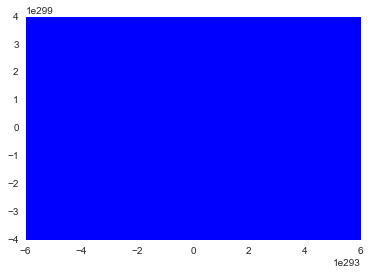

In [93]:
fig, ax = plt.subplots()
for i in range(len(X)):
    ax.scatter(X_train_km[i][0], X_train_km[i][1], X_train_km[i][2])

ax.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150)

plt.show()